In [429]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import warnings



In [430]:
# la bound
# lb bound
# ht bound


In [431]:
def gen_deadline(exec_time, period):
    # [a,b]
    b = 1.2 * period
    if(exec_time < 10):
        a = exec_time
    elif(exec_time < 100 and exec_time >= 10):
        a = 2*exec_time
    elif(exec_time < 1000 and exec_time >= 100):
        a = 3*exec_time
    else:
        a = 4*exec_time

    a = 0.95*period
    return a+random.random()*(b-a)


def gen_tasksets(utilizations, periods):

    def trunc(x, p):
        return int(x * 10 ** p) / float(10 ** p)
    # [[print(ui) for ui, pi in zip(us, ps)]
    #         for us, ps in zip(utilizations, periods)]
    return np.array([[[trunc(ui * pi, 6), trunc(pi, 6), trunc(gen_deadline(trunc(ui * pi, 6), trunc(pi, 6)), 6)] for ui, pi in zip(us, ps)]
            for us, ps in zip(utilizations, periods)])


In [432]:
def custom_period(n, nsets,max_,min_=1):
	max_power = np.log(max_)
	min_power = np.log(min_)

	intervals = np.arange(min_power,np.floor(max_power)+1)
	intervals = np.append(intervals, max_power)
	#print(intervals)
	task_pp = ((n-1)//(len(intervals)-1))
	
	task_lf = np.mod(n-1, len(intervals)-1).astype(int)
	#print(task_lf,task_pp)
	periods = np.zeros((nsets, n))
	for i in range(nsets):
		for j in range(len(intervals)-1):
			if(j<task_lf):
				periods[i][j*task_pp+j:(j+1)*task_pp+j+1] = np.random.uniform(low=np.exp(intervals[j]), high=np.exp(intervals[j+1]), size=task_pp+1)
			else:
				periods[i][j*task_pp+task_lf:(j+1)*task_pp+task_lf] = np.random.uniform(low=np.exp(intervals[j]), high=np.exp(intervals[j+1]), size=task_pp)
	periods[0:nsets,-1] =max_ 
	return periods


In [433]:
custom_period(14,2,100)

array([[  1.35851413,   1.99105833,   1.91802843,   7.23229697,
          5.03008026,   3.85486449,  17.32435089,  10.61915227,
         16.87077838,  21.98887804,  24.19550484,  60.00389152,
         71.67017393, 100.        ],
       [  2.16284632,   1.2227512 ,   1.19248731,   4.30970537,
          2.90553477,   6.89392452,  10.39896112,   8.11345499,
          7.95783634,  25.66998064,  20.90096872,  72.37218553,
         87.21329277, 100.        ]])

In [434]:
def UUniFastDiscard(n, u, nsets):
    sets = []
    while len(sets) < nsets:
        # Classic UUniFast algorithm:
        utilizations = []
        sumU = u
        for i in range(1, n):
            nextSumU = sumU * random.random() ** (1.0 / (n - i))
            utilizations.append(sumU - nextSumU)
            sumU = nextSumU
        utilizations.append(sumU)

        # If no task utilization exceeds 1:
        if all(ut <= 1 for ut in utilizations):
            sets.append(utilizations)

    return sets

    
def gen_uunifastdiscard(nsets, u, n):
    return UUniFastDiscard(n, u, nsets)

In [435]:
def get_taskset(nsets, n,t_max = 1000,util =0.9):
	#n = 1000
	utilizations = gen_uunifastdiscard(nsets, util, n)
	periods = custom_period(n, nsets, t_max, 1)
	return gen_tasksets(utilizations, periods)

	

In [436]:
taskset = get_taskset(1, 8)
taskset

array([[[3.07810000e-01, 2.26339600e+00, 2.25438700e+00],
        [8.45154000e-01, 5.81060400e+00, 5.55880800e+00],
        [3.13706400e+00, 1.80168530e+01, 1.79864190e+01],
        [4.40664600e+00, 2.12754740e+01, 2.18434080e+01],
        [5.71756800e+00, 1.43730199e+02, 1.63983110e+02],
        [3.94601000e-01, 3.00267324e+02, 3.50549476e+02],
        [1.05510271e+02, 8.66402162e+02, 8.69006901e+02],
        [7.44390430e+01, 1.00000000e+03, 1.03732985e+03]]])

In [437]:
taskset[0]

array([[3.07810000e-01, 2.26339600e+00, 2.25438700e+00],
       [8.45154000e-01, 5.81060400e+00, 5.55880800e+00],
       [3.13706400e+00, 1.80168530e+01, 1.79864190e+01],
       [4.40664600e+00, 2.12754740e+01, 2.18434080e+01],
       [5.71756800e+00, 1.43730199e+02, 1.63983110e+02],
       [3.94601000e-01, 3.00267324e+02, 3.50549476e+02],
       [1.05510271e+02, 8.66402162e+02, 8.69006901e+02],
       [7.44390430e+01, 1.00000000e+03, 1.03732985e+03]])

In [438]:
taskset_paper = np.array([[6000, 18000, 31000], [2000, 9000, 9800], [1000, 12000, 17000], [
                         90, 3000, 4200], [8, 78, 96], [2, 16, 12], [10, 120, 280], [26, 160, 660]])


In [439]:
def procDemand_func(taskset,t):
    deadlines = taskset[:,1]
    periods = taskset[:,2]
    wcet = taskset[:,0]

    h_t = np.sum(np.maximum(0, 1 + np.floor((t-deadlines)/(periods)))*wcet)

    return h_t

In [440]:
t = 16974
ht = procDemand_func(taskset_paper, t)
print(ht)

8890.0


In [441]:
print(taskset)

[[[3.07810000e-01 2.26339600e+00 2.25438700e+00]
  [8.45154000e-01 5.81060400e+00 5.55880800e+00]
  [3.13706400e+00 1.80168530e+01 1.79864190e+01]
  [4.40664600e+00 2.12754740e+01 2.18434080e+01]
  [5.71756800e+00 1.43730199e+02 1.63983110e+02]
  [3.94601000e-01 3.00267324e+02 3.50549476e+02]
  [1.05510271e+02 8.66402162e+02 8.69006901e+02]
  [7.44390430e+01 1.00000000e+03 1.03732985e+03]]]


In [442]:
taskset_paper = np.array([[6000, 18000, 31000], [2000, 9000, 9800], [1000, 12000, 17000], [90, 3000, 4200], [8, 78, 96], [2, 16, 12], [10, 120, 280], [26, 160, 660]])

In [443]:
def La_bound(taskset):
	"""
	Compute La calculations for the La bound
	
	"""
	wcet = taskset[:,0]
	deadlines = taskset[:,1]
	periods = taskset[:,2]
	utilizations = wcet/periods
	total_utilization = np.sum(utilizations)
	La = np.maximum(np.max(deadlines),np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	return La


In [444]:
taskset = get_taskset(1, 25)
la = La_bound(taskset)
print(la)

1.071782


In [445]:
La = La_bound(taskset_paper)
taskset_paper[:,0]/taskset_paper[:,1]
print(La)

18000.0


In [446]:
def Lb_bound(taskset):
    wcet = taskset[:,0]
    deadlines = taskset[:,1]
    periods = taskset[:,2]
    w0 = np.sum(wcet)
    a = w0
    b = np.sum(np.ceil(np.round((a/periods), 1)*wcet))
    while a != b and (((a**2 - b**2) > 0.0000001 or (b**2 - a**2) > 0.0000001)):
        #if (a**2 - b**2 > 0 and (np.sqrt(a**2 - b**2) > 0.0001)) or (a**2 - b**2 < 0 and (np.sqrt(b**2 - a**2) > 0.0001)):
        a = b
        b = np.round(np.sum(np.ceil(a/periods)*wcet), 1)
        
    Lb = b
    
    return Lb

In [447]:
Lb = Lb_bound(taskset_paper)
print(Lb)

16984.0


In [448]:
deadlines = taskset_paper[:, 1]
d_min = np.min(deadlines)
print(d_min)

16


In [449]:
def get_dmin(deadliness, L):
    return np.min(deadliness)
    
    

In [450]:
deadlines = taskset_paper[:, 1]
L = np.minimum(La, Lb)
d_min = get_dmin(deadlines, L)
print(d_min)


16


In [451]:
taskset_paper.shape

(8, 3)

In [452]:
def get_max_abs_deadline(taskset, L):
    n = taskset.shape[0]
    abs_deadlines = []
    
    for i in range(n):
        p = 0
        j = 0
        Ti = taskset[i][2]
        Di = taskset[i][1]
        while p < L:
            j += 1
            q = p
            p = j*Ti + Di
            
        abs_deadlines.append(q)
    return np.max(abs_deadlines)
    

In [453]:
L = 16984
t = get_max_abs_deadline(taskset_paper, L)

print(t)

16974


In [454]:
def get_max_di(taskset, t):
    n = taskset.shape[0]
    d_max = 0
    
    for j in range(n):
        if taskset[j][1] < t:
            d = np.floor((t - taskset[j][1])/taskset[j][2])*taskset[j][2] + taskset[j][1]
            if d == t:
                d = d - taskset[j][2]
            if d > d_max:
                d_max = d
                
    return d_max
    
    

In [455]:
def La_starbound(taskset):
	"""
	Compute La calculations for the La bound
	
	"""
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	utilizations = wcet/periods
	#print("deadlines", deadlines, "periods", periods, "utilizations", utilizations)
	#print(deadlines, periods, utilizations)
	total_utilization = np.sum(utilizations)
	#print("total utilization : " + str(total_utilization))
	# print(np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	#La = np.maximum(np.max(deadlines),np.max((periods-deadlines))*(total_utilization/(1-total_utilization)))
	print(np.max(deadlines))
	La = np.maximum(np.max(deadlines-periods),
	                np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	return La


In [456]:
def La_starcalculations(taskset):
	La_star = La_starbound(taskset)
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((La_star)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((La_star)/job[2])
		tot_abs_deadlines += job_abs_deadline
		print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [457]:
def La_boudcalculations(taskset):
	La = La_bound(taskset)
	#print("La : " + str(La))
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((La)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((La)/job[1])
		tot_abs_deadlines += job_abs_deadline
		#print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [458]:
def Lb_boudcalculations(taskset):
	Lb = Lb_bound(taskset)
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	#print(Lb)
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((Lb)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((Lb)/job[2])
		tot_abs_deadlines += job_abs_deadline
		#print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [459]:
qpa(taskset_paper)

t : 17992
h(t) : 9222.0
--t : 17992
--h(t) : 9222.0
--t : 9222.0
--h(t) : 5178.0
--t : 5178.0
--h(t) : 1782.0
--t : 1782.0
--h(t) : 578.0
--t : 578.0
--h(t) : 188.0
--t : 188.0
--h(t) : 82.0
--t : 82.0
--h(t) : 20.0
--t : 20.0
--h(t) : 2.0


9

In [460]:
taskset_paper = np.array([[6000,18000,31000],[2000,9000,9800],[1000,12000,17000],[90,3000,4200],[8,78,96],[2,16,12],[10,120,280],[26,160,660]])

In [461]:
taskset = get_taskset(1, 5)
#taskset
taskset = np.array(taskset[0])
qpa(taskset)


t : 999.340634
h(t) : 743.6942300000001
--t : 999.340634
--h(t) : 743.6942300000001
--t : 743.6942300000001
--h(t) : 552.7816819999999
--t : 552.7816819999999
--h(t) : 409.80878600000005
--t : 409.80878600000005
--h(t) : 302.93479099999996
--t : 302.93479099999996
--h(t) : 223.677001
--t : 223.677001
--h(t) : 165.528354
--t : 165.528354
--h(t) : 121.58376899999999
--t : 121.58376899999999
--h(t) : 89.008287
--t : 89.008287
--h(t) : 65.185028
--t : 65.185028
--h(t) : 46.837215
--t : 46.837215
--h(t) : 32.78806
--t : 32.78806
--h(t) : 23.013956
--t : 23.013956
--h(t) : 15.519077


14

In [462]:
x = [2, 9]
# x.append(np.random.randint(1, 100))
# print(x)

qpa_y = []
for i in x:
	print(i)
	taskset = get_taskset(1, int(i))
	qpa_y.append(qpa(taskset[0]))


2
t : 998.5062069999999
h(t) : 490.87665000000004
--t : 998.5062069999999
--h(t) : 490.87665000000004
--t : 490.87665000000004
--h(t) : 240.97581000000002
--t : 240.97581000000002
--h(t) : 118.00873
--t : 118.00873
--h(t) : 57.51686
--t : 57.51686
--h(t) : 27.76676
--t : 27.76676
--h(t) : 12.89171
9
t : 999.83365
h(t) : 478.808257
--t : 999.83365
--h(t) : 478.808257
--t : 478.808257
--h(t) : 196.003874
--t : 196.003874
--h(t) : 55.779315
--t : 55.779315
--h(t) : 12.796619


In [463]:
def qpa(taskset):

    La = La_bound(taskset)
    #print("La : " + str(La))
    #Lb = Lb_bound(taskset)
    #print("Lb : " + str(Lb))
    L = La#np.minimum(La, Lb)
    #print("L : " + str(L))

    t = get_max_abs_deadline(taskset, L)
    #print("t : " + str(t))
    h_t = procDemand_func(taskset, t)
    #print("h(t) : " + str(h_t))
    d_min = get_dmin(taskset[:,1], L)


    total_cal = 1

    while h_t <= t and h_t > d_min:
        h_t = procDemand_func(taskset, t)
        total_cal += 1

        #print("--t : " + str(t))
        #print("--h(t) : " + str(h_t))
        if h_t < t:
            t = h_t
        else:
            d_max = get_max_di(taskset, t)
            t = d_max

    if h_t <= d_min:
        #print("Task set is schedulable")
        #print("total calculations : " + str(total_cal))
        return total_cal
    else:
        print("Task set is not schedulable")
        #print("total calculations : " + str(total_cal))
        return total_cal


10 0
6000
20 1
6000
40 2
6000
80 3
6000
160 4
6000
320 5
6000
640 6
6000
1280 7
6000
[11.685333333333332, 11.7845, 11.691333333333333, 11.6005, 11.6385, 11.653666666666666, 11.670833333333333, 11.747]


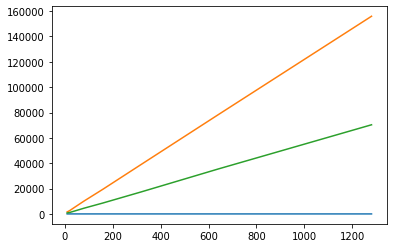

In [469]:
x = [10, 20, 40, 80, 160, 320, 640, 1280]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(x[i],i)
        taskset = get_taskset(6000, int(x[i]))
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                ht_calculated = True
                total_count+=1
            else:
                #print("utilization is greater than 1")
                continue

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            la_cal[l] += La_boudcalculations(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        lb_cal[l] = lb_cal[l]/total_count
        print(total_count)
        l += 1

print(q)
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


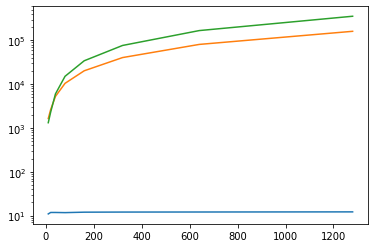

In [ ]:
plt.yscale("log")
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


In [470]:
print(q)
print(la_cal)
print(lb_cal)

[11.685333333333332, 11.7845, 11.691333333333333, 11.6005, 11.6385, 11.653666666666666, 11.670833333333333, 11.747]
[1590.9701666666667, 2554.762833333333, 5092.323833333333, 10117.352333333334, 19581.130833333333, 39173.74183333333, 78251.91666666667, 155948.6765]
[776.8085, 1114.7641666666666, 2243.455, 4508.888333333333, 8661.123833333333, 17436.305166666665, 35445.19616666667, 70327.07516666666]


10 0
300
100 1
300
1000 2
300
10000 3
300
100000 4
300
1000000 5
300
[4.133333333333334, 7.506666666666667, 11.273333333333333, 13.716666666666667, 19.02, 21.816666666666666]


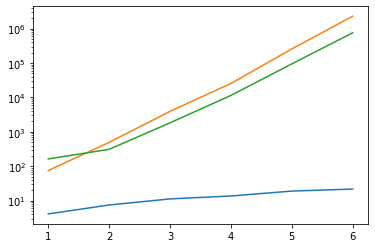

In [467]:
x = [1, 2, 3, 4, 5, 6]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(10**x[i],i)
        taskset = get_taskset(300, 30,t_max=10**x[i])
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                ht_calculated = True
                total_count+=1
            else:
                #print("utilization is greater than 1")
                continue

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            #print(qpa(task))
            la_cal[l] += La_boudcalculations(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        lb_cal[l] = lb_cal[l]/total_count
        print(total_count)
        l += 1

print(q)
plt.yscale("log")
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


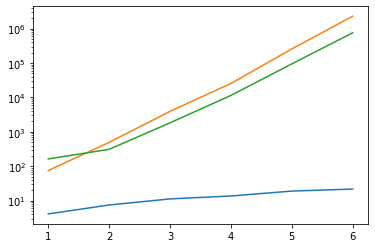

In [468]:
plt.yscale("log")
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


0.66 0
6000
0.69 1
6000
0.72 2
6000
0.75 3
6000
0.78 4
6000
0.81 5
6000
0.84 6
6000
0.87 7
6000
0.9 8
6000
0.93 9
6000
0.96 10
6000
0.99 11
5561
[5.461666666666667, 5.758166666666667, 6.050333333333334, 6.3785, 6.706666666666667, 7.105, 7.511333333333333, 7.9975, 8.540166666666666, 9.1955, 9.948, 10.736198525445063]


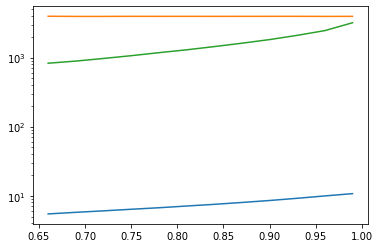

In [ ]:
x = [0.66,0.69,0.72,0.75,0.78,0.81,0.84,0.87,0.9,0.93,0.96,0.99]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(x[i],i)
        taskset = get_taskset(6000, 30,util = x[i])
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                ht_calculated = True
                total_count+=1
            else:
                #print("utilization is greater than 1")
                continue

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            la_cal[l] += La_boudcalculations(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        lb_cal[l] = lb_cal[l]/total_count
        print(total_count)
        l += 1

print(q)
plt.yscale("log")
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)

## Max of Di/Ti